<a href="https://colab.research.google.com/github/Stormlocc/NoSQL-CompareQueryEmbebedReference/blob/main/atributoVStiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determinar relacion de consultas entre numero de atributos vs tiempos_Cache en un diseno referencial y anidado

Utilizaremos el siguiente data set para realizar las pruebas de tiempo

In [2]:
#   https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

## Cargamos los datos de forma referencial y anidada

### *Agregamos los datos de forma referencial*

In [3]:
import pymongo
import time

# Crear una conexión a la instancia de MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Seleccionar la base de datos en la que deseas insertar los documentos
db = client["ENEM_DB21_REF"]

# Colección para el primer documento
cAluno = db["aluno"]

# Colección para el segundo documento
cProva = db["prova"]

#i=1
inicio = time.time()
with open('MICRODADOS_ENEM_2021.csv', 'r', encoding='ISO-8859-1') as f:
    # Lê a primeira linha do arquivo CSV (cabeçalho)
    header = f.readline().strip().split(';')
    # Imprime o cabeçalho
    #print(header)
    # Lê cada linha do arquivo CSV
    for line in f:
        # Cria um dicionário com os valores das colunas na linha atual
        row = dict(zip(header, line.strip().split(';')))
        # Acessa os valores das colunas pelo nome da coluna
        prova = {  
            "TP_PRESENCA_CN": int(row["TP_PRESENCA_CN"]),      
            "TP_PRESENCA_CH": int(row["TP_PRESENCA_CH"]),
            "TP_PRESENCA_LC": int(row["TP_PRESENCA_LC"]),
            "TP_PRESENCA_MT": int(row["TP_PRESENCA_MT"]),
            "CO_PROVA_CN": int(row["CO_PROVA_CN"]) if row["CO_PROVA_CN"] else None,
            "CO_PROVA_CH": int(row["CO_PROVA_CH"]) if row["CO_PROVA_CH"] else None,
            "CO_PROVA_LC": int(row["CO_PROVA_LC"]) if row["CO_PROVA_LC"] else None,
            "CO_PROVA_MT": int(row["CO_PROVA_MT"]) if row["CO_PROVA_MT"] else 0,
            "NU_NOTA_CN": float(row["NU_NOTA_CN"]) if row["NU_NOTA_CN"] else 0,
            "NU_NOTA_CH": float(row["NU_NOTA_CH"]) if row["NU_NOTA_CH"] else 0,
            "NU_NOTA_LC": float(row["NU_NOTA_LC"]) if row["NU_NOTA_LC"] else 0,
            "NU_NOTA_MT": float(row["NU_NOTA_MT"]) if row["NU_NOTA_MT"] else 0,
            "TX_RESPOSTAS_CN": row["TX_RESPOSTAS_CN"],
            "TX_RESPOSTAS_CH": row["TX_RESPOSTAS_CH"],
            "TX_RESPOSTAS_LC": row["TX_RESPOSTAS_LC"],
            "TX_RESPOSTAS_MT": row["TX_RESPOSTAS_MT"],
            "TP_LINGUA": int(row["TP_LINGUA"]),
            "TX_GABARITO_CN": row["TX_GABARITO_CN"],
            "TX_GABARITO_CH": row["TX_GABARITO_CH"],
            "TX_GABARITO_LC": row["TX_GABARITO_LC"],
            "TX_GABARITO_MT": row["TX_GABARITO_MT"],
            #dados do local de aplicacao da prova
            "CO_MUNICIPIO_PROVA": int(row["CO_MUNICIPIO_PROVA"]),
            "NO_MUNICIPIO_PROVA": row["NO_MUNICIPIO_PROVA"],
            "CO_UF_PROVA": row["CO_UF_PROVA"],
            "SG_UF_PROVA": row["SG_UF_PROVA"],
            "DADOS:REDACAO": {
                "TP_STATUS_REDACAO": int(row["TP_STATUS_REDACAO"]) if row["TP_STATUS_REDACAO"] else None,
                "NU_NOTA_COMP1": int(row["NU_NOTA_COMP1"]) if row["NU_NOTA_COMP1"] else None,
                "NU_NOTA_COMP2": int(row["NU_NOTA_COMP2"]) if row["NU_NOTA_COMP2"] else None,
                "NU_NOTA_COMP3": int(row["NU_NOTA_COMP3"]) if row["NU_NOTA_COMP3"] else None,
                "NU_NOTA_COMP4": int(row["NU_NOTA_COMP4"]) if row["NU_NOTA_COMP4"] else None,
                "NU_NOTA_COMP5": int(row["NU_NOTA_COMP5"]) if row["NU_NOTA_COMP5"] else None,
                "NU_NOTA_REDACAO": int(row["NU_NOTA_REDACAO"]) if row["NU_NOTA_REDACAO"] else None
            }
        }
        
        # Insertar el documento 1 en la colección 1 de MongoDB y obtener el ID generado
        id_prova = cProva.insert_one(prova).inserted_id

        aluno = {
            "_id": row["NU_INSCRICAO"],
            "NU_ANO": int(row["NU_ANO"]),
            "TP_FAIXA_ETARIA": int(row["TP_FAIXA_ETARIA"]),
            "TP_SEXO": row["TP_SEXO"],
            "TP_ESTADO_CIVIL": int(row["TP_ESTADO_CIVIL"]),
            "TP_COR_RACA": int(row["TP_COR_RACA"]),
            "TP_NACIONALIDADE": int(row["TP_NACIONALIDADE"]),
            "TP_ST_CONCLUSAO": int(row["TP_ST_CONCLUSAO"]),
            "TP_ANO_CONCLUIU": int(row["TP_ANO_CONCLUIU"]),
            "TP_ESCOLA": int(row["TP_ESCOLA"]),
            "TP_ENSINO": int(row["TP_ENSINO"]) if row["TP_ENSINO"] else 0,
            "IN_TREINEIRO": int(row["IN_TREINEIRO"]),
            "DADOS_SOCIOECONOMICOS":{
                "Q001": row["Q001"],
                "Q002": row["Q002"],
                "Q003": row["Q003"],
                #Q4 y q5 son string pero en el diccionario indica numerico
                "Q004": row["Q004"],
                "Q005": row["Q005"],
                "Q006": row["Q006"],
                "Q007": row["Q007"],
                "Q008": row["Q008"],
                "Q009": row["Q009"],
                "Q010": row["Q010"],
                "Q011": row["Q011"],
                "Q012": row["Q012"],
                "Q013": row["Q013"],
                "Q014": row["Q014"],
                "Q015": row["Q015"],
                "Q016": row["Q016"],
                "Q017": row["Q017"],
                "Q018": row["Q018"],
                "Q019": row["Q019"],
                "Q020": row["Q020"],
                "Q021": row["Q021"],
                "Q022": row["Q022"],
                "Q023": row["Q023"],
                "Q024": row["Q024"],
                "Q025": row["Q025"],
            },
            "id_prova": id_prova
        }
        
         # Insertar el documento 2 en la colección 2 de MongoDB
        cAluno.insert_one(aluno)
        
        #print(i)
        #i = i+1

    # Cerrar la conexión a MongoDB
    client.close()

print("Exito")
fin = time.time()

print("Tiempo inicio:",inicio)
print("Tiempo fin:",fin)
print("Tiempo total:",(fin-inicio))


Exito
Tiempo inicio: 1693436659.6377218
Tiempo fin: 1693438054.5385764
Tiempo total: 1394.900854587555


### *Agregamoos los datos de forma anidada*

In [2]:
import pymongo
import time

# Crear una conexión a la instancia de MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Seleccionar la base de datos en la que deseas insertar los documentos
db = client["ENEM_DB21_ANI"]

#1
cAluno_prova = db["aluno_prova"]

#i=1
inicio = time.time()
with open('MICRODADOS_ENEM_2021.csv', 'r', encoding='ISO-8859-1') as f:
    # Lê a primeira linha do arquivo CSV (cabeçalho)
    header = f.readline().strip().split(';')
    # Imprime o cabeçalho
    #print(header)
    #print()
    # Lê cada linha do arquivo CSV
    for line in f:
        # Cria um dicionário com os valores das colunas na linha atual
        row = dict(zip(header, line.strip().split(';')))
        #print(row)
    
        # Acessa os valores das colunas pelo nome da coluna
        aluno_prova = { 
            "TP_PRESENCA_CN": int(row["TP_PRESENCA_CN"]),      
            "TP_PRESENCA_CH": int(row["TP_PRESENCA_CH"]),
            "TP_PRESENCA_LC": int(row["TP_PRESENCA_LC"]),
            "TP_PRESENCA_MT": int(row["TP_PRESENCA_MT"]),
            "CO_PROVA_CN": int(row["CO_PROVA_CN"]) if row["CO_PROVA_CN"] else None,
            "CO_PROVA_CH": int(row["CO_PROVA_CH"]) if row["CO_PROVA_CH"] else None,
            "CO_PROVA_LC": int(row["CO_PROVA_LC"]) if row["CO_PROVA_LC"] else None,
            "CO_PROVA_MT": int(row["CO_PROVA_MT"]) if row["CO_PROVA_MT"] else 0,
            "NU_NOTA_CN": float(row["NU_NOTA_CN"]) if row["NU_NOTA_CN"] else 0,
            "NU_NOTA_CH": float(row["NU_NOTA_CH"]) if row["NU_NOTA_CH"] else 0,
            "NU_NOTA_LC": float(row["NU_NOTA_LC"]) if row["NU_NOTA_LC"] else 0,
            "NU_NOTA_MT": float(row["NU_NOTA_MT"]) if row["NU_NOTA_MT"] else 0,
            "TX_RESPOSTAS_CN": row["TX_RESPOSTAS_CN"],
            "TX_RESPOSTAS_CH": row["TX_RESPOSTAS_CH"],
            "TX_RESPOSTAS_LC": row["TX_RESPOSTAS_LC"],
            "TX_RESPOSTAS_MT": row["TX_RESPOSTAS_MT"],
            "TP_LINGUA": int(row["TP_LINGUA"]),
            "TX_GABARITO_CN": row["TX_GABARITO_CN"],
            "TX_GABARITO_CH": row["TX_GABARITO_CH"],
            "TX_GABARITO_LC": row["TX_GABARITO_LC"],
            "TX_GABARITO_MT": row["TX_GABARITO_MT"],
            #dados do local de aplicacao da prova
            "CO_MUNICIPIO_PROVA": int(row["CO_MUNICIPIO_PROVA"]),
            "NO_MUNICIPIO_PROVA": row["NO_MUNICIPIO_PROVA"],
            "CO_UF_PROVA": row["CO_UF_PROVA"],
            "SG_UF_PROVA": row["SG_UF_PROVA"],
            "DADOS:REDACAO": {
                "TP_STATUS_REDACAO": int(row["TP_STATUS_REDACAO"]) if row["TP_STATUS_REDACAO"] else None,
                "NU_NOTA_COMP1": int(row["NU_NOTA_COMP1"]) if row["NU_NOTA_COMP1"] else None,
                "NU_NOTA_COMP2": int(row["NU_NOTA_COMP2"]) if row["NU_NOTA_COMP2"] else None,
                "NU_NOTA_COMP3": int(row["NU_NOTA_COMP3"]) if row["NU_NOTA_COMP3"] else None,
                "NU_NOTA_COMP4": int(row["NU_NOTA_COMP4"]) if row["NU_NOTA_COMP4"] else None,
                "NU_NOTA_COMP5": int(row["NU_NOTA_COMP5"]) if row["NU_NOTA_COMP5"] else None,
                "NU_NOTA_REDACAO": int(row["NU_NOTA_REDACAO"]) if row["NU_NOTA_REDACAO"] else None,
            
            #Aqui entran prova
            "NU_ANO": int(row["NU_ANO"]),
            "TP_FAIXA_ETARIA": int(row["TP_FAIXA_ETARIA"]),
            "TP_SEXO": row["TP_SEXO"],
            "TP_ESTADO_CIVIL": int(row["TP_ESTADO_CIVIL"]),
            "TP_COR_RACA": int(row["TP_COR_RACA"]),
            "TP_NACIONALIDADE": int(row["TP_NACIONALIDADE"]),
            "TP_ST_CONCLUSAO": int(row["TP_ST_CONCLUSAO"]),
            "TP_ANO_CONCLUIU": int(row["TP_ANO_CONCLUIU"]),
            "TP_ESCOLA": int(row["TP_ESCOLA"]),
            "TP_ENSINO": int(row["TP_ENSINO"]) if row["TP_ENSINO"] else 0,
            "IN_TREINEIRO": int(row["IN_TREINEIRO"]),
            "DADOS_SOCIOECONOMICOS":{
                "Q001": row["Q001"],
                "Q002": row["Q002"],
                "Q003": row["Q003"],
                #Q4 y q5 son string pero en el diccionario indica numerico
                "Q004": row["Q004"],
                "Q005": row["Q005"],
                "Q006": row["Q006"],
                "Q007": row["Q007"],
                "Q008": row["Q008"],
                "Q009": row["Q009"],
                "Q010": row["Q010"],
                "Q011": row["Q011"],
                "Q012": row["Q012"],
                "Q013": row["Q013"],
                "Q014": row["Q014"],
                "Q015": row["Q015"],
                "Q016": row["Q016"],
                "Q017": row["Q017"],
                "Q018": row["Q018"],
                "Q019": row["Q019"],
                "Q020": row["Q020"],
                "Q021": row["Q021"],
                "Q022": row["Q022"],
                "Q023": row["Q023"],
                "Q024": row["Q024"],
                "Q025": row["Q025"],
                }
            }
        }
         # Insertar el documento 2 en la colección 2 de MongoDB
        #cAluno.insert_one(aluno)
        cAluno_prova.insert_one(aluno_prova)
        #print(i)
        #i = i+1


    # Cerrar la conexión a MongoDB
    client.close()

print("Exito")
fin = time.time()

print("Tiempo inicio:",inicio)
print("Tiempo fin:",fin)
print("Tiempo total:",(fin-inicio))



Exito
Tiempo inicio: 1693874347.3595417
Tiempo fin: 1693875409.774837
Tiempo total: 1062.4152953624725


## Inicio de medidas 

Importamos librerias

In [1]:
#liberias
from pymongo import MongoClient
import time

Conectamos al servidor local de la DB

In [2]:
# Conectarse al servidor local de MongoDB
client = MongoClient()

Almacenamos variables necesarias para las consultas

In [3]:
# Acceder a la base de datos "ENEM_DB21"
db = client.ENEM_DB21

# Acceder a la colección "aluno" y "prova"
cAluno = db.aluno

cProva = db.prova

Creamos las consultas

In [13]:
pipeline_ref3 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref5 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref7 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ref9 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ref11 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref13 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref15 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref17 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref19 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,"TP_ANO_CONCLUIU":1, "TP_ENSINO":1 ,"SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]
''' 
db.aluno.aggregate([
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,"TP_ANO_CONCLUIU":1, "TP_ENSINO":1 ,"SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
])
'''
pipeline_refAll = [
    {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
    {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
    #{"$project":{"_id": 1, "NU_ANO": 1, "TP_FAIXA_ETARIA": 1, "TP_SEXO": 1, "TP_ESTADO_CIVIL": 1, "TP_COR_RACA": 1, "TP_NACIONALIDADE": 1, "TP_ST_CONCLUSAO":1, "TP_ESCOLA": 1, "TP_ENSINO":1, "IN_TREINEIRO":1, "Q001":1, "Q002":1, "Q003":1,"Q004":1,"Q005":1,"Q006":1,"Q007":1,"Q008":1,"Q009":1,"Q010":1,"Q011":1,"Q012":1,"Q013":1,"Q014":1,"Q015":1,"Q016":1,"Q017":1,"Q018":1,"Q019":1,"Q020":1,"Q021":1,"Q021":1,"Q022":1,"Q022":1,"Q023":1,"Q024":1,"Q025":1 "dados_prova.CO_MUNICIPIO_PROVA": 1, "dados_prova.NO_MUNICIPIO_PROVA": 1, "dados_prova.TP_PRESENCA_CN": 1, "dados_prova.TP_PRESENCA_CH": 1, "dados_prova.TP_PRESENCA_LC": 1, "dados_prova.TP_PRESENCA_MT": 1 }}
]

consultas_referenciales = [ pipeline_ref3, pipeline_ref5, pipeline_ref7, pipeline_ref9, pipeline_ref11, pipeline_ref13, pipeline_ref15, pipeline_ref17, pipeline_ref19, pipeline_refAll]
print("Cantidad de variedad de consultas referenciales:",len(consultas_referenciales))

Cantidad de variedad de consultas referenciales: 10


In [14]:
pipeline_ani3 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani5 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani7 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ani9 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ani11 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani13 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani15 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani17 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ani19 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,"TP_ANO_CONCLUIU":1, "TP_ENSINO":1 ,"SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]
''' 
db.aluno.aggregate([
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,"TP_ANO_CONCLUIU":1, "TP_ENSINO":1 ,"SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
])
'''
pipeline_aniAll = [
    {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}}
    #{"$project":{"_id": 1, "NU_ANO": 1, "TP_FAIXA_ETARIA": 1, "TP_SEXO": 1, "TP_ESTADO_CIVIL": 1, "TP_COR_RACA": 1, "TP_NACIONALIDADE": 1, "TP_ST_CONCLUSAO":1, "TP_ESCOLA": 1, "TP_ENSINO":1, "IN_TREINEIRO":1, "Q001":1, "Q002":1, "Q003":1,"Q004":1,"Q005":1,"Q006":1,"Q007":1,"Q008":1,"Q009":1,"Q010":1,"Q011":1,"Q012":1,"Q013":1,"Q014":1,"Q015":1,"Q016":1,"Q017":1,"Q018":1,"Q019":1,"Q020":1,"Q021":1,"Q021":1,"Q022":1,"Q022":1,"Q023":1,"Q024":1,"Q025":1 "dados_prova.CO_MUNICIPIO_PROVA": 1, "dados_prova.NO_MUNICIPIO_PROVA": 1, "dados_prova.TP_PRESENCA_CN": 1, "dados_prova.TP_PRESENCA_CH": 1, "dados_prova.TP_PRESENCA_LC": 1, "dados_prova.TP_PRESENCA_MT": 1 }}
]

consultas_anidadas = [ pipeline_ani3, pipeline_ani5, pipeline_ani7, pipeline_ani9, pipeline_ani11, pipeline_ani13, pipeline_ani15, pipeline_ani17, pipeline_ani19, pipeline_aniAll]
print("Cantidad de variedad de consultas anidadas:",len(consultas_anidadas))

Cantidad de variedad de consultas anidadas: 10


In [15]:
#Diccionario: nroAtriburo:nombre
dic_atributos = {
    3:"3 atributos",
    5:"5 atributos",
    7:"7 atributos",
    9:"9 atributos",
    11:"11 atributos",
    13:"13 atributos",
    15:"15 atributos",
    17:"17 atributos",
    19:"19 atributos",
    33:"33 atributos"
}

#### Ejecutamos las consultas utilizando el cache, capturamos el tiempo de ejecucion y sobreescribimos en un archivo csv

Referencial

In [19]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 400
archivo_csv_cache_ref= 'datosTiempo_conCache_ref.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_Cache_ref=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ref in enumerate(consultas_referenciales):
        # calculando tempos
        start_time_ref = time.time()
        resultados_ref = db.aluno.aggregate(pipeline_ref)
        end_time_ref = time.time()

        tempo_execucao_ref = (end_time_ref - start_time_ref)*1000
        tiempo.append(tempo_execucao_ref)
    tiempos_Cache_ref.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_Cache_ref = np.array(tiempos_Cache_ref)

#Guardamos en el archivo
with open(archivo_csv_cache_ref, 'a') as archivo:
    np.savetxt(archivo, tiempos_Cache_ref, delimiter=',')

print(tiempos_Cache_ref)


[[1.46579742 0.80251694 1.08671188 ... 0.29420853 0.25844574 0.20933151]
 [0.22411346 0.2849102  0.22959709 ... 0.22983551 0.24056435 0.18286705]
 [0.21648407 0.20098686 0.20599365 ... 0.27918816 0.26679039 0.19621849]
 ...
 [0.18501282 0.21243095 0.19979477 ... 0.25677681 0.2579689  0.18334389]
 [0.24914742 0.34856796 0.30875206 ... 0.27680397 0.39386749 0.54764748]
 [0.60606003 0.3926754  0.41460991 ... 0.28181076 0.46300888 0.51450729]]


Anidado

In [20]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 400
archivo_csv_cache_ani= 'datosTiempo_conCache_ani.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_Cache_ani=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ani in enumerate(consultas_anidadas):
        # calculando tempos
        start_time_ani = time.time()
        resultados_ani = db.aluno.aggregate(pipeline_ani)
        end_time_ani = time.time()

        tempo_execucao_ani = (end_time_ani - start_time_ani)*1000
        tiempo.append(tempo_execucao_ani)
    tiempos_Cache_ani.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_Cache_ani = np.array(tiempos_Cache_ani)

#Guardamos en el archivo
with open(archivo_csv_cache_ani, 'a') as archivo:
    np.savetxt(archivo, tiempos_Cache_ani, delimiter=',')

print(tiempos_Cache_ani)


[[1.15823746 0.55861473 0.45609474 ... 0.36025047 0.32067299 0.25558472]
 [0.259161   0.26273727 0.32758713 ... 0.28777122 0.28705597 0.25773048]
 [0.25296211 0.25248528 0.29683113 ... 0.31113625 0.32401085 0.238657  ]
 ...
 [0.29397011 0.26082993 0.26392937 ... 0.28324127 0.26941299 0.21648407]
 [0.22768974 0.23579597 0.23818016 ... 0.3080368  0.53238869 0.86450577]
 [0.53811073 0.40435791 0.41460991 ... 0.25033951 0.22816658 0.15974045]]


#### Ejecutamos las consultas eliminando el cache, capturamos el tiempo de ejecucion y sobreescribimos en un archivo csv

Referencial

In [21]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 400
archivo_csv_sinCache_ref= 'datosTiempo_sinCache_ref.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_sinCache_ref=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ref in enumerate(consultas_referenciales):
        
        # Ejecutar planCacheClear()
        db.command('planCacheClear', 'aluno')
        db.command('planCacheClear', 'prova')
        db.command({ "planCacheClear": "aluno" })
        db.command({ "planCacheClear": "prova" })
        
        # calculando tempos
        start_time_ref = time.time()
        resultados_ref = db.aluno.aggregate(pipeline_ref)
        end_time_ref = time.time()

        tempo_execucao_ref = (end_time_ref - start_time_ref)*1000
        tiempo.append(tempo_execucao_ref)
    tiempos_sinCache_ref.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_sinCache = np.array(tiempos_sinCache_ref)

#Guardamos en el archivo
with open(archivo_csv_sinCache_ref, 'a') as archivo:
    np.savetxt(archivo, tiempos_sinCache, delimiter=',')

print(tiempos_sinCache)

[[1.01017952 1.1510849  0.99611282 ... 0.85377693 0.68354607 1.2588501 ]
 [0.73194504 0.74601173 0.76699257 ... 0.76723099 0.72741508 0.49257278]
 [0.55575371 0.62942505 0.65851212 ... 0.39839745 0.29468536 0.21457672]
 ...
 [0.23293495 0.21290779 0.21648407 ... 0.21839142 0.2219677  0.17356873]
 [0.19359589 0.19335747 0.19717216 ... 0.55575371 0.33807755 0.17404556]
 [0.19168854 0.25749207 0.2758503  ... 0.22768974 0.22315979 0.30827522]]


Anidado

In [23]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 400
archivo_csv_sinCache_ani= 'datosTiempo_sinCache_ani.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_sinCache_ani=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ani in enumerate(consultas_anidadas):
        
        # Ejecutar planCacheClear()
        db.command('planCacheClear', 'aluno')
        db.command('planCacheClear', 'prova')
        db.command({ "planCacheClear": "aluno" })
        db.command({ "planCacheClear": "prova" })
        
        # calculando tempos
        start_time_ani = time.time()
        resultados_ani = db.aluno.aggregate(pipeline_ani)
        end_time_ani = time.time()

        tempo_execucao_ani = (end_time_ani - start_time_ani)*1000
        tiempo.append(tempo_execucao_ani)
    tiempos_sinCache_ani.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_sinCache_ani = np.array(tiempos_sinCache_ani)

#Guardamos en el archivo
with open(archivo_csv_sinCache_ani, 'a') as archivo:
    np.savetxt(archivo, tiempos_sinCache_ani, delimiter=',')

print(tiempos_sinCache_ani)

[[0.86402893 0.80156326 0.94747543 ... 0.72431564 0.6248951  0.98347664]
 [0.72860718 0.66995621 1.70326233 ... 0.59866905 1.28912926 1.49846077]
 [0.82015991 0.52785873 0.32639503 ... 0.35667419 0.34308434 0.41985512]
 ...
 [0.1745224  0.17786026 0.18978119 ... 0.20051003 0.20384789 0.33593178]
 [0.60248375 0.92077255 0.20503998 ... 0.25892258 0.22268295 0.16403198]
 [0.17380714 0.17881393 0.17499924 ... 0.21839142 0.20837784 0.14925003]]


## Obtenemos las metricas y procesamos

### Abrimos el archivos (cache) y guardamos en una nueva matriz

Referencial

In [25]:
import csv
import numpy as np

print("Cantidad de tiempos cache iniciales",len(tiempos_Cache_ref))

matriz = []

with open(archivo_csv_cache_ref, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_Cache_ref = np.array(matriz)

print("Cantidad de tiempos cache actual - leidos de archivo",len(tiempos_Cache_ref))


Cantidad de tiempos cache iniciales 400
Cantidad de tiempos cache actual - leidos de archivo 400


anidado

In [ ]:
import csv
import numpy as np

print("Cantidad de tiempos cache iniciales",len(tiempos_Cache_ani))

matriz = []

with open(archivo_csv_cache_ani, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_Cache_ani = np.array(matriz)

print("Cantidad de tiempos cache actual - leidos de archivo",len(tiempos_Cache_ani))


### Abrimos el archivos (Sin cache) y guardamos en una nueva matriz

Referencial

In [27]:
import csv
import numpy as np

print("Cantidad de tiempos sin Cache iniciales",len(tiempos_sinCache_ref))

matriz = []

with open(archivo_csv_sinCache_ref, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_sinCache_ref = np.array(matriz)

print("Cantidad de tiempos actual sin Cache - leidos de archivo",len(tiempos_sinCache_ref))

Cantidad de tiempos cache iniciales 400
Cantidad de tiempos cache actual - leidos de archivo 400


Anidado

In [28]:
import csv
import numpy as np

print("Cantidad de tiempos sin Cache iniciales",len(tiempos_sinCache_ani))

matriz = []

with open(archivo_csv_sinCache_ani, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_sinCache_ani = np.array(matriz)

print("Cantidad de tiempos actual sin Cache - leidos de archivo",len(tiempos_sinCache_ani))

Cantidad de tiempos sin Cache iniciales 400
Cantidad de tiempos actual sin Cache - leidos de archivo 400


### Promediamos los tiempos

In [29]:
import numpy as np
#Cache ref
promedio_tiempos_cache_ref = np.mean(tiempos_Cache_ref, axis=0)
print("cache promedios referencial",promedio_tiempos_cache_ref)
#Cache ani
promedio_tiempos_cache_ani = np.mean(tiempos_Cache_ani, axis=0)
print("cache promedios anidado",promedio_tiempos_cache_ani)

#Sin cache ref
promedio_tiempos_sinCache_ref = np.mean(tiempos_sinCache_ref, axis=0)
print("sin cache promedios referencial",promedio_tiempos_sinCache_ref)
#Sin cache ani
promedio_tiempos_sinCache_ani = np.mean(tiempos_sinCache_ani, axis=0)
print("sin cache promedios anidado",promedio_tiempos_sinCache_ani)

cache promedios referencial [0.25885344 0.25552154 0.25854886 0.25978386 0.25911331 0.26907086
 0.27646005 0.28149068 0.28605759 0.23025513]
cache promedios anidado [0.2669102  0.26186764 0.27137637 0.28245568 0.28268516 0.28788686
 0.29526472 0.30492604 0.3142035  0.23839176]
sin cache promedios referencial [0.2763024  0.28012246 0.28742045 0.29102892 0.29478431 0.30828595
 0.30863762 0.3156969  0.31181544 0.24546534]
sin cache promedios anidado [0.31008065 0.31436205 0.31943738 0.34460843 0.31217813 0.32781303
 0.35059929 0.34422457 0.34025669 0.26411176]


### Dataset de los tiempos de consulta

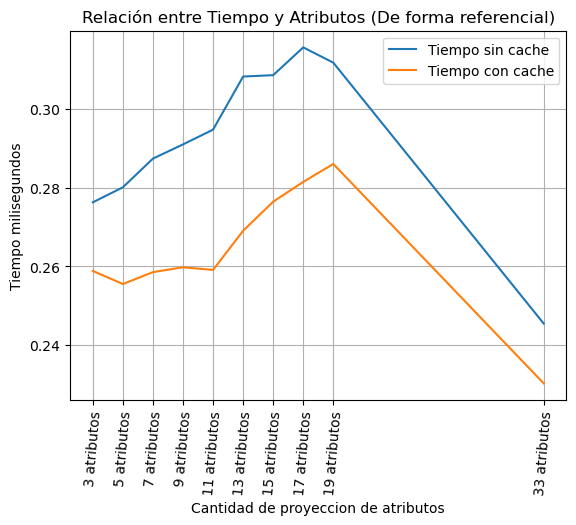

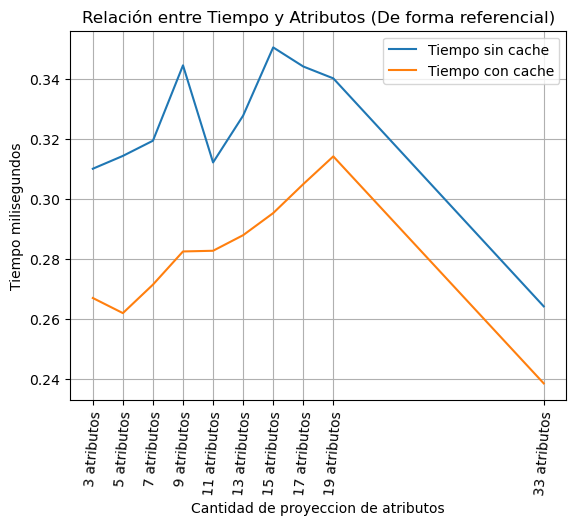

In [32]:
import matplotlib.pyplot as plt

atributos = list(dic_atributos.keys())
atributos_name = list(dic_atributos.values())

plt.plot(atributos, promedio_tiempos_sinCache_ref, label="Tiempo sin cache")
plt.plot(atributos, promedio_tiempos_cache_ref, label="Tiempo con cache")
plt.xlabel('Cantidad de proyeccion de atributos')
plt.ylabel('Tiempo milisegundos')
plt.xticks(atributos,atributos_name,rotation=85)
plt.title('Relación entre Tiempo y Atributos (De forma referencial)')
plt.legend()
plt.grid()
plt.show()

plt.plot(atributos, promedio_tiempos_sinCache_ani, label="Tiempo sin cache")
plt.plot(atributos, promedio_tiempos_cache_ani, label="Tiempo con cache")
plt.xlabel('Cantidad de proyeccion de atributos')
plt.ylabel('Tiempo milisegundos')
plt.xticks(atributos,atributos_name,rotation=85)
plt.title('Relación entre Tiempo y Atributos (De forma referencial)')
plt.legend()
plt.grid()
plt.show()

Razon